**Chapter 7 – time series analysis**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/hanchen92/handson-ml3/blob/main/07_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/hanchen92/handson-ml3/main/07_time_series_analysis.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Data Download

In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!pip install pmdarima

--2024-10-27 15:55:29--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.197.101, 74.125.197.113, 74.125.197.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-27 15:55:29--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-10-27 15:55:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import numpy as np

sns.set_theme()


fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')



# 改style要在改font之前
# plt.style.use('seaborn')
mpl.rcParams['font.sans-serif']=['Microsoft YaHei']
mpl.rcParams['figure.figsize'] = 12,6

In [3]:
accident_data = pd.read_csv("https://raw.githubusercontent.com/hanchen92/THU-STAT-BigData-113-1-6189/refs/heads/main/datasets/taichung_traffic_accident_count_by_hour.csv")
accident_data["time_hour"] = pd.to_datetime(accident_data['time_hour'])

# Exploratory Data Analysis (EDA)

<Axes: xlabel='time_hour', ylabel='count'>

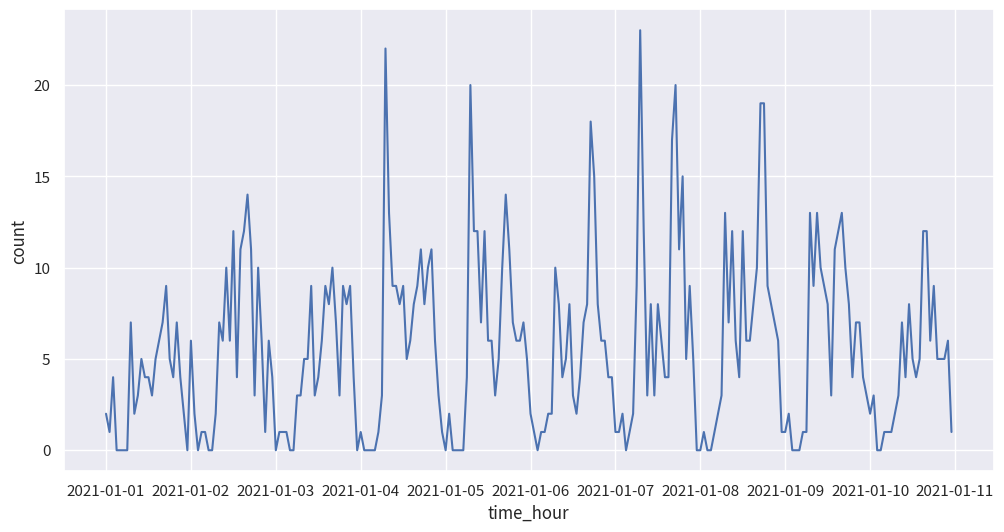

In [4]:
accident_data2 = accident_data.iloc[0:(24*10),:]
sns.lineplot(data = accident_data.iloc[0:(24*10),:], x="time_hour", y="count")

In [5]:
!pip install --upgrade holidays
import holidays
accident_data["week"] = accident_data["time_hour"].dt.day_name().astype("category")
my_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
accident_data["week"] = accident_data["week"].cat.reorder_categories(my_order)
accident_data["hour"] = accident_data["time_hour"].dt.hour
accident_data["holidays"] = accident_data["time_hour"].apply(lambda x: 1 if holidays.country_holidays('TW').get(x) else 0)

Mean number of accidents per hour for each day of the week and holiday indicator.

In [6]:
tmp_week_holiday_test_sum = accident_data[["week","holidays","count"]].groupby(["week","holidays"]).sum().reset_index().pivot(index="holidays",columns="week",values="count")
tmp_week_holiday_test_mean = accident_data[["week","holidays","count"]].groupby(["week","holidays"]).mean().reset_index().pivot(index="holidays",columns="week",values="count")
tmp_week_holiday_test_mean


<ipython-input-6-cde67022f5f2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp_week_holiday_test_sum = accident_data[["week","holidays","count"]].groupby(["week","holidays"]).sum().reset_index().pivot(index="holidays",columns="week",values="count")
<ipython-input-6-cde67022f5f2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp_week_holiday_test_mean = accident_data[["week","holidays","count"]].groupby(["week","holidays"]).mean().reset_index().pivot(index="holidays",columns="week",values="count")


week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
holidays,,,,,,,
0,5.235507,5.304167,5.312908,5.393791,5.829082,4.585784,3.620660
1,3.694444,3.020833,5.833333,2.833333,4.114583,2.625000,3.958333


In [7]:
tmp_week_holiday_hour_test_mean = accident_data[["week","holidays","hour","count"]].groupby(["week","holidays","hour"]).mean().reset_index()

<ipython-input-7-444a0c3ddc8a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp_week_holiday_hour_test_mean = accident_data[["week","holidays","hour","count"]].groupby(["week","holidays","hour"]).mean().reset_index()


Mean number of accidents per hour for each hour of each day of the week.

<Axes: xlabel='hour'>

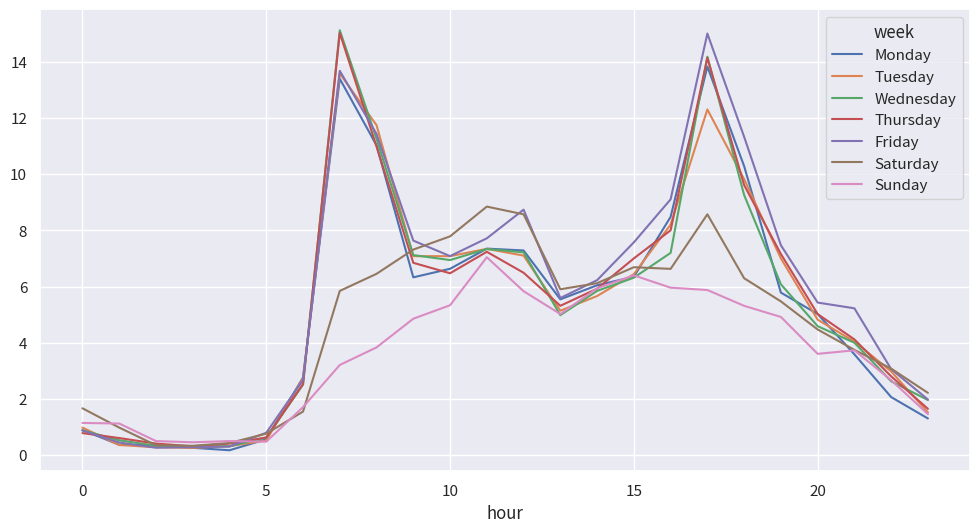

In [8]:
tmp_holidays = tmp_week_holiday_hour_test_mean["holidays"]
tmp_week_holiday_hour_test_mean2 = tmp_week_holiday_hour_test_mean.drop("holidays",axis=1)
tmp_week_holiday_hour_test_mean2_noholidays = tmp_week_holiday_hour_test_mean2.loc[tmp_holidays==0,:]
tmp_week_holiday_hour_test_mean2_noholidays.pivot(index="hour",columns="week",values="count").plot()

<Axes: xlabel='hour'>

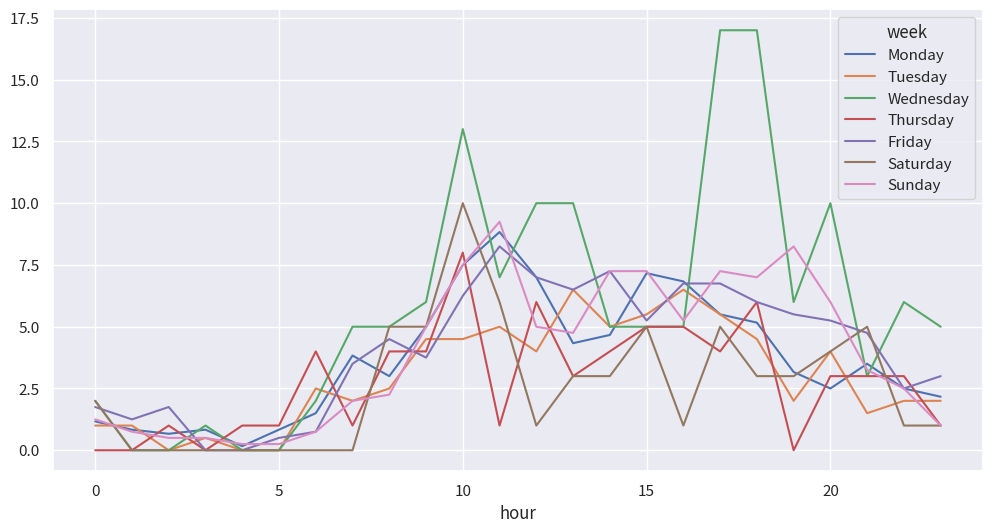

In [9]:
tmp_week_holiday_hour_test_mean2_holidays = tmp_week_holiday_hour_test_mean2.loc[tmp_holidays==1,:]
tmp_week_holiday_hour_test_mean2_holidays.pivot(index="hour",columns="week",values="count").plot()

In [10]:
accident_data["weekdays"] = np.where(((accident_data["week"]!="Saturday") & (accident_data["week"]!="Sunday")),"weekdays",accident_data["week"])
accident_data.drop("week",axis=1,inplace=True)

Mean number of accidents per hour for each hour of each month.

<ipython-input-11-f4f3133c75c1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp_month_holiday_test_mean = accident_data[["month","hour","count"]].groupby(["month","hour"]).mean().reset_index().pivot(index="hour",columns="month",values="count")


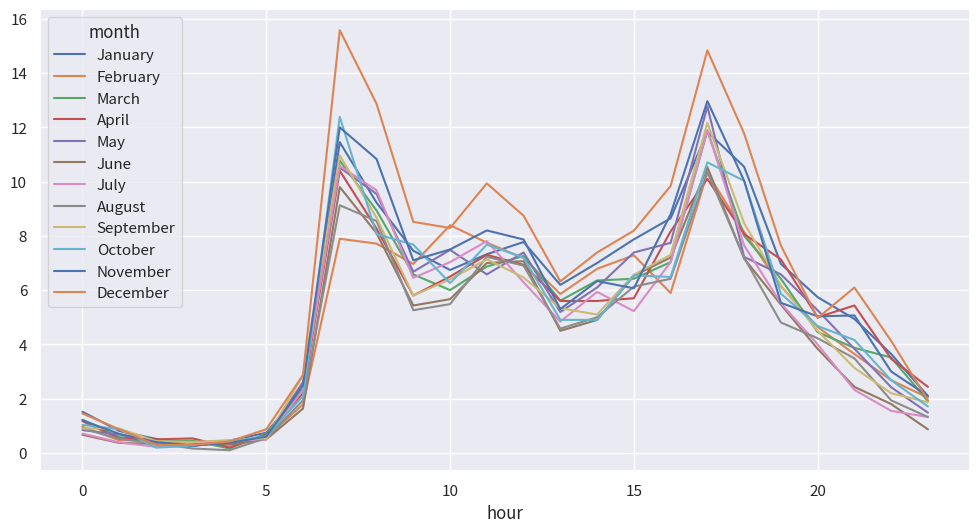

In [11]:
accident_data["month"] = accident_data["time_hour"].dt.month_name().astype("category")
accident_data["month"] = accident_data["month"].cat.reorder_categories(["January","February","March","April","May","June","July","August","September","October","November","December"])
tmp_month_holiday_test_mean = accident_data[["month","hour","count"]].groupby(["month","hour"]).mean().reset_index().pivot(index="hour",columns="month",values="count")
tmp_month_holiday_test_mean.plot()

accident_data.drop("month",axis=1,inplace=True)

# Check Stationary

- Dickey-Fuller test test whether a time series is stationary or not.

$$
\begin{align*}
H_0:& \text{nonstationary}\\H_1:& \text{stationary}
\end{align*}$$

- The following test rejects the hypothesis that the time series is non-stationary by $\text{p-values}\leq 0.01$.

In [12]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


accident_data2 = accident_data.copy()
accident_data2["count"] = np.log(1+accident_data["count"])

check_stationarity(accident_data2["count"])

ADF Statistic: -11.449042
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


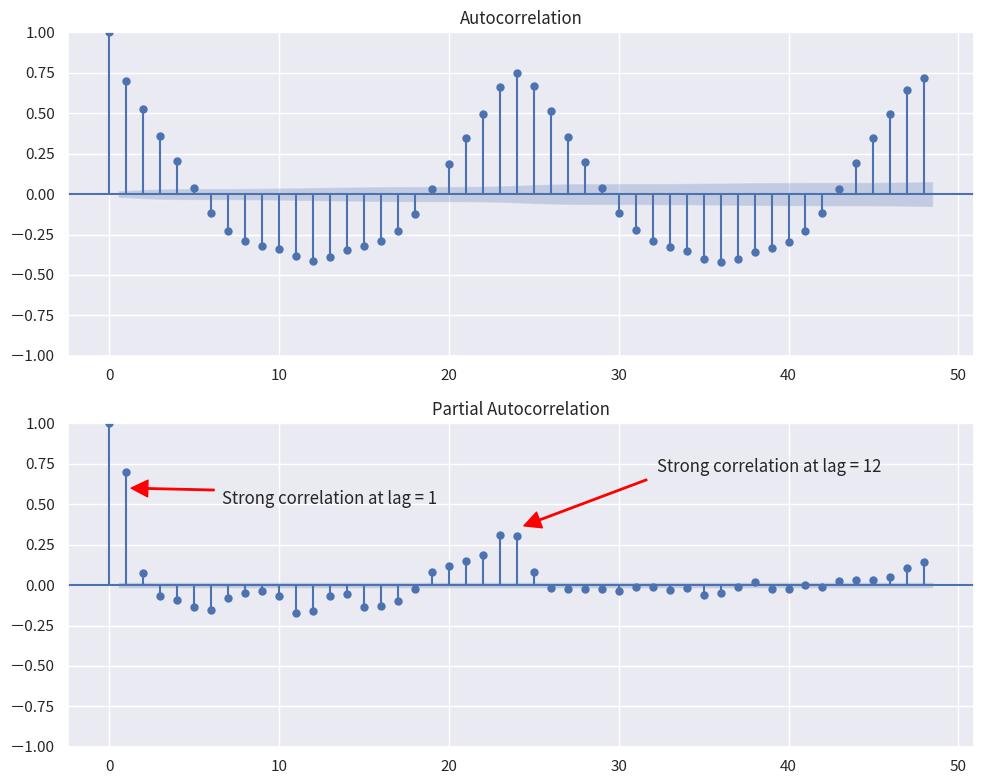

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plot_acf(accident_data2["count"],lags = 48, ax=ax[0])
plot_pacf(accident_data2["count"],lags = 48, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('Strong correlation at lag = 12', xy=(24, 0.35),  xycoords='data',
            xytext=(0.65, 0.85), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

# Build Models

## ARIMA Model

In [14]:
from pmdarima.arima import ARIMA
from pmdarima.arima import AutoARIMA

y = accident_data2["count"]

n = len(accident_data2["count"])
train_n = int(n*0.7)
test_n = int(n*0.3)
# out_of_sample_size: 告知沒有參與訓練的資料大小
model = ARIMA(order = (6,0,6),
              seasonal_order = (1,0,1,24),
              out_of_sample_size = test_n)
model_fit = model.fit(y)
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 8760
Model:             SARIMAX(6, 0, 6)x(1, 0, [1], 24)   Log Likelihood               -5594.015
Date:                              Sun, 27 Oct 2024   AIC                          11220.030
Time:                                      16:06:09   BIC                          11333.277
Sample:                                           0   HQIC                         11258.617
                                             - 8760                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.002      3.406      0.001       0.003       0.011
ar.L1         -1.4459      0.179     -8.076      0.000      -1.797      -1.095
ar.L2         -0.9142      0.185     -4.949      0.000      -1.276      -0.552
ar.L3         -0.8134      0.104     -7.844      0.000      -1.017      -0.610
ar.L4         -0.3269      0.160     -2.042      0.041      -0.641      -0.013
ar.L5          0.6122      0.073      8.404      0.000       0.469       0.755
ar.L6          0.4848      0.103      4.698      0.000       0.283       0.687
ma.L1          1.6462      0.178      9.233      0.000       1.297       1.996
ma.L2          1.3146      0.221      5.945      0.000       0.881       1.748
ma.L3          1.2397      0.157      7.911      0.000       0.933       1.547
ma.L4          0.7659      0.209      3.660      0.000       0.356       1.176
ma.L5         -0.2638      0.107     -2.472      0.013      -0.473      -0.055
ma.L6         -0.3721      0.070     -5.328      0.000      -0.509      -0.235
ar.S.L24       0.9985      0.000   3141.633      0.000       0.998       0.999
ma.S.L24      -0.9602      0.004   -265.642      0.000      -0.967      -0.953
sigma2         0.2047      0.003     75.879      0.000       0.199       0.210
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               509.80
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.47
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

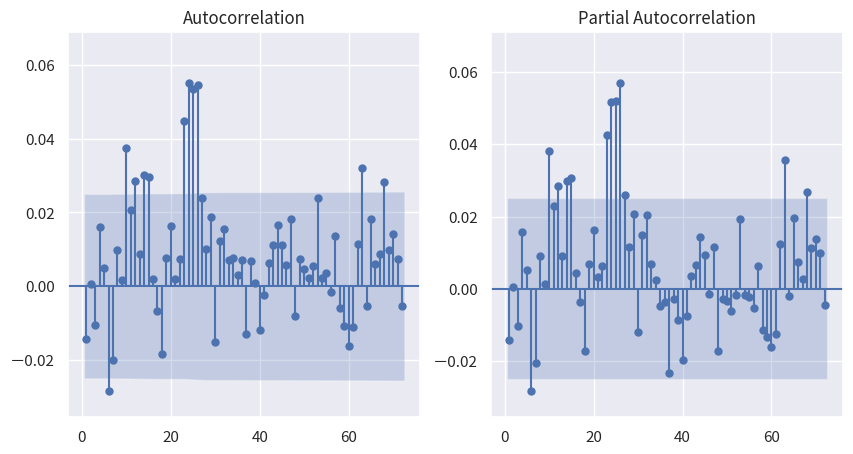

In [15]:
y_train_predict = model_fit.predict_in_sample(start = 0, end = train_n-1)
# 檢查殘差的 acf 和 pacf
fig, ax = plt.subplots(1,2,figsize = (10,5))
plot_acf(y[0:train_n]-y_train_predict, lags = 72, zero = False,
         auto_ylims = True, ax = ax[0])
plot_pacf(y[0:train_n]-y_train_predict, lags = 72, zero = False,
          auto_ylims = True, ax = ax[1])
plt.show()

In [16]:
test_predicts_dict = dict()
test_predicts_RMSE = dict()
test_predicts_RMSE_org = dict()

# 輸出測試集的預測值
y_test_predict = model_fit.predict_in_sample(start = n-(test_n), end = n-1)
test_predicts_dict["ARIMA"] = y_test_predict
test_predicts_RMSE["ARIMA"] = np.sqrt(np.mean((y.iloc[train_n:]-y_test_predict)**2))
test_predicts_RMSE_org["ARIMA"] = np.sqrt(np.mean((np.exp(y.iloc[train_n:])-np.exp(y_test_predict))**2))

## ARIMA with Exogenous Variables

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown='ignore')
X = accident_data2.drop("count",axis=1)


X_cat = X[["weekdays","holidays"]]
X_cat_1hot = cat_encoder.fit_transform(X_cat).toarray()
X_cat_final = pd.DataFrame(X_cat_1hot, columns = cat_encoder.get_feature_names_out(),
                         index=X.index)

X_cat_final2 = X_cat_final.loc[:,["weekdays_Sunday","weekdays_weekdays","holidays_1"]]
n = len(accident_data2["count"])
train_n = int(n*0.7)
test_n = int(n*0.3)
# out_of_sample_size: 告知沒有參與訓練的資料大小
model = ARIMA(order = (6,0,6),
              seasonal_order = (1,0,1,24),
              out_of_sample_size = test_n, maxiter = 200)
model_fit = model.fit(y = y, X = X_cat_final)
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 8760
Model:             SARIMAX(6, 0, 6)x(1, 0, [1], 24)   Log Likelihood              -10978.980
Date:                              Sun, 27 Oct 2024   AIC                          21999.959
Time:                                      16:10:18   BIC                          22148.596
Sample:                                           0   HQIC                         22050.605
                                             - 8760                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0204      0.003      7.792      0.000       0.015       0.026
x1         -3.375e+11      0.018  -1.84e+13      0.000   -3.38e+11   -3.38e+11
x2         -3.375e+11      0.020  -1.69e+13      0.000   -3.38e+11   -3.38e+11
x3         -3.375e+11      0.018  -1.86e+13      0.000   -3.38e+11   -3.38e+11
x4          3.375e+11      0.033   1.02e+13      0.000    3.38e+11    3.38e+11
x5          3.375e+11      0.033   1.02e+13      0.000    3.38e+11    3.38e+11
ar.L1          1.1092      0.041     27.228      0.000       1.029       1.189
ar.L2         -0.3972      0.036    -11.007      0.000      -0.468      -0.327
ar.L3          0.2087      0.029      7.094      0.000       0.151       0.266
ar.L4          0.0079      0.022      0.362      0.717      -0.035       0.051
ar.L5          0.5480      0.020     27.981      0.000       0.510       0.586
ar.L6         -0.5786      0.024    -23.832      0.000      -0.626      -0.531
ma.L1               0      0.038          0      1.000      -0.074       0.074
ma.L2               0      0.024          0      1.000      -0.048       0.048
ma.L3               0      0.024          0      1.000      -0.048       0.048
ma.L4               0      0.021          0      1.000      -0.041       0.041
ma.L5               0      0.019          0      1.000      -0.038       0.038
ma.L6               0      0.016          0      1.000      -0.032       0.032
ar.S.L24       0.9784      0.002    445.801      0.000       0.974       0.983
ma.S.L24      -0.7509      0.006   -126.483      0.000      -0.763      -0.739
sigma2         0.3208      0.005     67.959      0.000       0.312       0.330
===================================================================================
Ljung-Box (L1) (Q):                3008.37   Jarque-Bera (JB):                44.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.00
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+19. Standard errors may be unstable.
"""

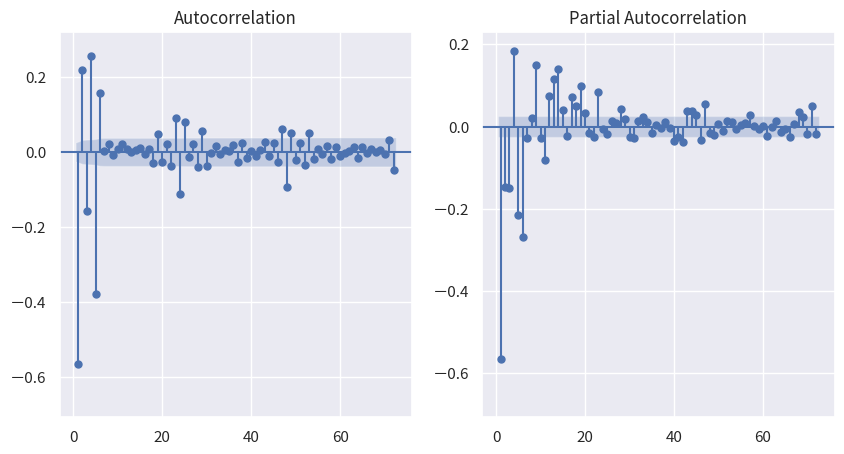

In [18]:
y_train_predict = model_fit.predict_in_sample(start = 0, end = train_n-1, X = X_cat_final.iloc[0:train_n,:])
# 檢查殘差的 acf 和 pacf
fig, ax = plt.subplots(1,2,figsize = (10,5))
plot_acf(y[0:train_n]-y_train_predict, lags = 72, zero = False,
         auto_ylims = True, ax = ax[0])
plot_pacf(y[0:train_n]-y_train_predict, lags = 72, zero = False,
          auto_ylims = True, ax = ax[1])
plt.show()

In [19]:
# 輸出測試集的預測值
y_test_predict = model_fit.predict_in_sample(start = train_n, end = n-1, X = X_cat_final.iloc[train_n:,:])
test_predicts_dict["ARIMA_exog"] = y_test_predict
test_predicts_RMSE["ARIMA_exog"] = np.sqrt(np.mean((y.iloc[train_n:]-y_test_predict)**2))
test_predicts_RMSE_org["ARIMA_exog"] = np.sqrt(np.mean((np.exp(y.iloc[train_n:])-np.exp(y_test_predict))**2))

In [20]:
tmp_max_lag = 25
X_cont_lag = np.transpose(np.array([y.shift(i) for i in range(1,tmp_max_lag)]))
X_cont_final = pd.DataFrame(X_cont_lag, columns = ["lag"+str(i) for i in range(1,tmp_max_lag)])

X_final = pd.concat([X_cat_final,X_cont_final],axis=1)



train_X = X_final.iloc[:train_n,].dropna()
test_X = X_final.iloc[(train_n):,]

train_y = y.loc[train_X.index]
test_y = y.iloc[(train_n):]





In [21]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

train_X_scale = StandardScaler().fit_transform(train_X)
test_X_scale = StandardScaler().fit_transform(test_X)

model_lasso = LassoCV(cv=10, random_state=0)
model_lasso.fit(train_X_scale, train_y)
model_lasso.coef_

array([-0.00000000e+00, -3.25392673e-02,  3.64164826e-02,  1.63280510e-02,
       -1.28399074e-16,  2.40569286e-01,  4.86324904e-02,  2.45724586e-03,
        7.10945582e-03, -1.03625445e-02, -5.74857636e-02, -2.88174968e-02,
       -1.65752308e-02, -4.28865150e-03,  1.61604415e-02, -1.87912056e-02,
       -4.71570385e-02, -2.74773170e-02,  1.85958592e-02,  0.00000000e+00,
       -2.69678620e-02, -2.75864982e-02, -4.51848806e-02,  1.50333418e-03,
        1.28327955e-02,  7.05804633e-03,  2.99545340e-02,  1.61822979e-01,
        2.64142517e-01])

In [22]:
train_X.columns[np.argsort(-1*np.abs(model_lasso.coef_),)]

Index(['lag24', 'lag1', 'lag23', 'lag6', 'lag2', 'lag12', 'lag18',
       'weekdays_weekdays', 'weekdays_Sunday', 'lag22', 'lag7', 'lag17',
       'lag13', 'lag16', 'lag11', 'lag14', 'lag8', 'holidays_0', 'lag10',
       'lag20', 'lag5', 'lag4', 'lag21', 'lag9', 'lag3', 'lag19', 'holidays_1',
       'lag15', 'weekdays_Saturday'],
      dtype='object')

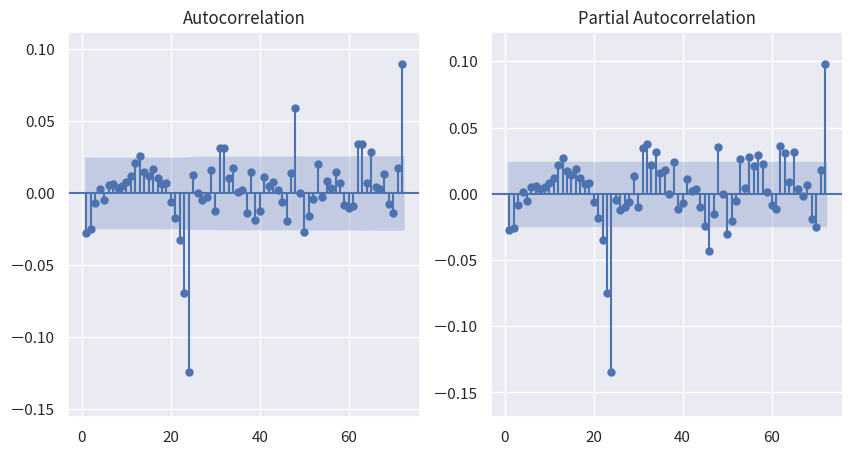

In [23]:
y_train_predict = model_lasso.predict(train_X_scale)
y_test_predict_CVlasso = model_lasso.predict(test_X_scale)

test_predicts_dict["CVLasso"] = y_test_predict_CVlasso
test_predicts_RMSE["CVLasso"] = np.sqrt(np.mean((test_y-y_test_predict_CVlasso)**2))
test_predicts_RMSE_org["CVLasso"] = np.sqrt(np.mean((np.exp(test_y)-np.exp(y_test_predict_CVlasso))**2))


# 檢查殘差的 acf 和 pacf
fig, ax = plt.subplots(1,2,figsize = (10,5))
plot_acf(train_y-y_train_predict, lags = 72, zero = False,
         auto_ylims = True, ax = ax[0])
plot_pacf(train_y-y_train_predict, lags = 72, zero = False,
          auto_ylims = True, ax = ax[1])
plt.show()


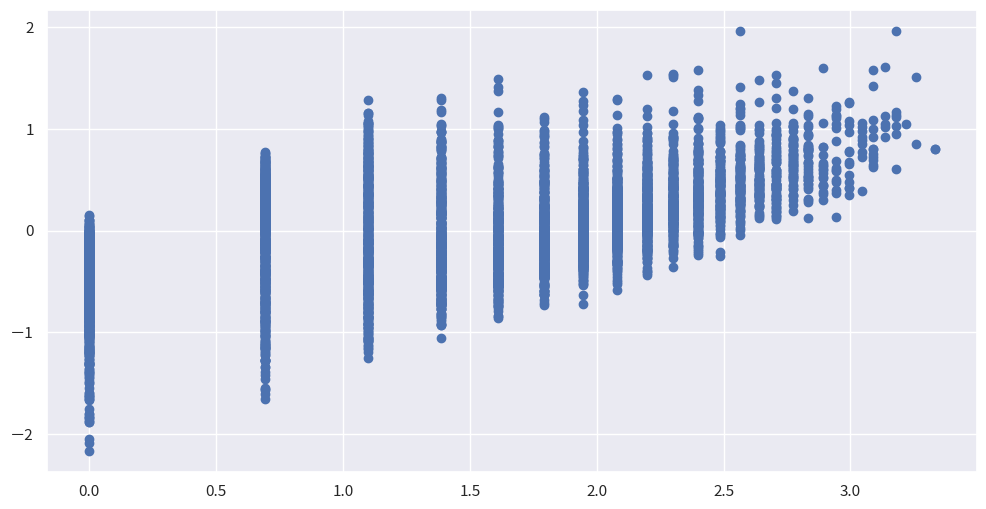

In [24]:
plt.plot(train_y,train_y-y_train_predict,'o')

## Tree Model

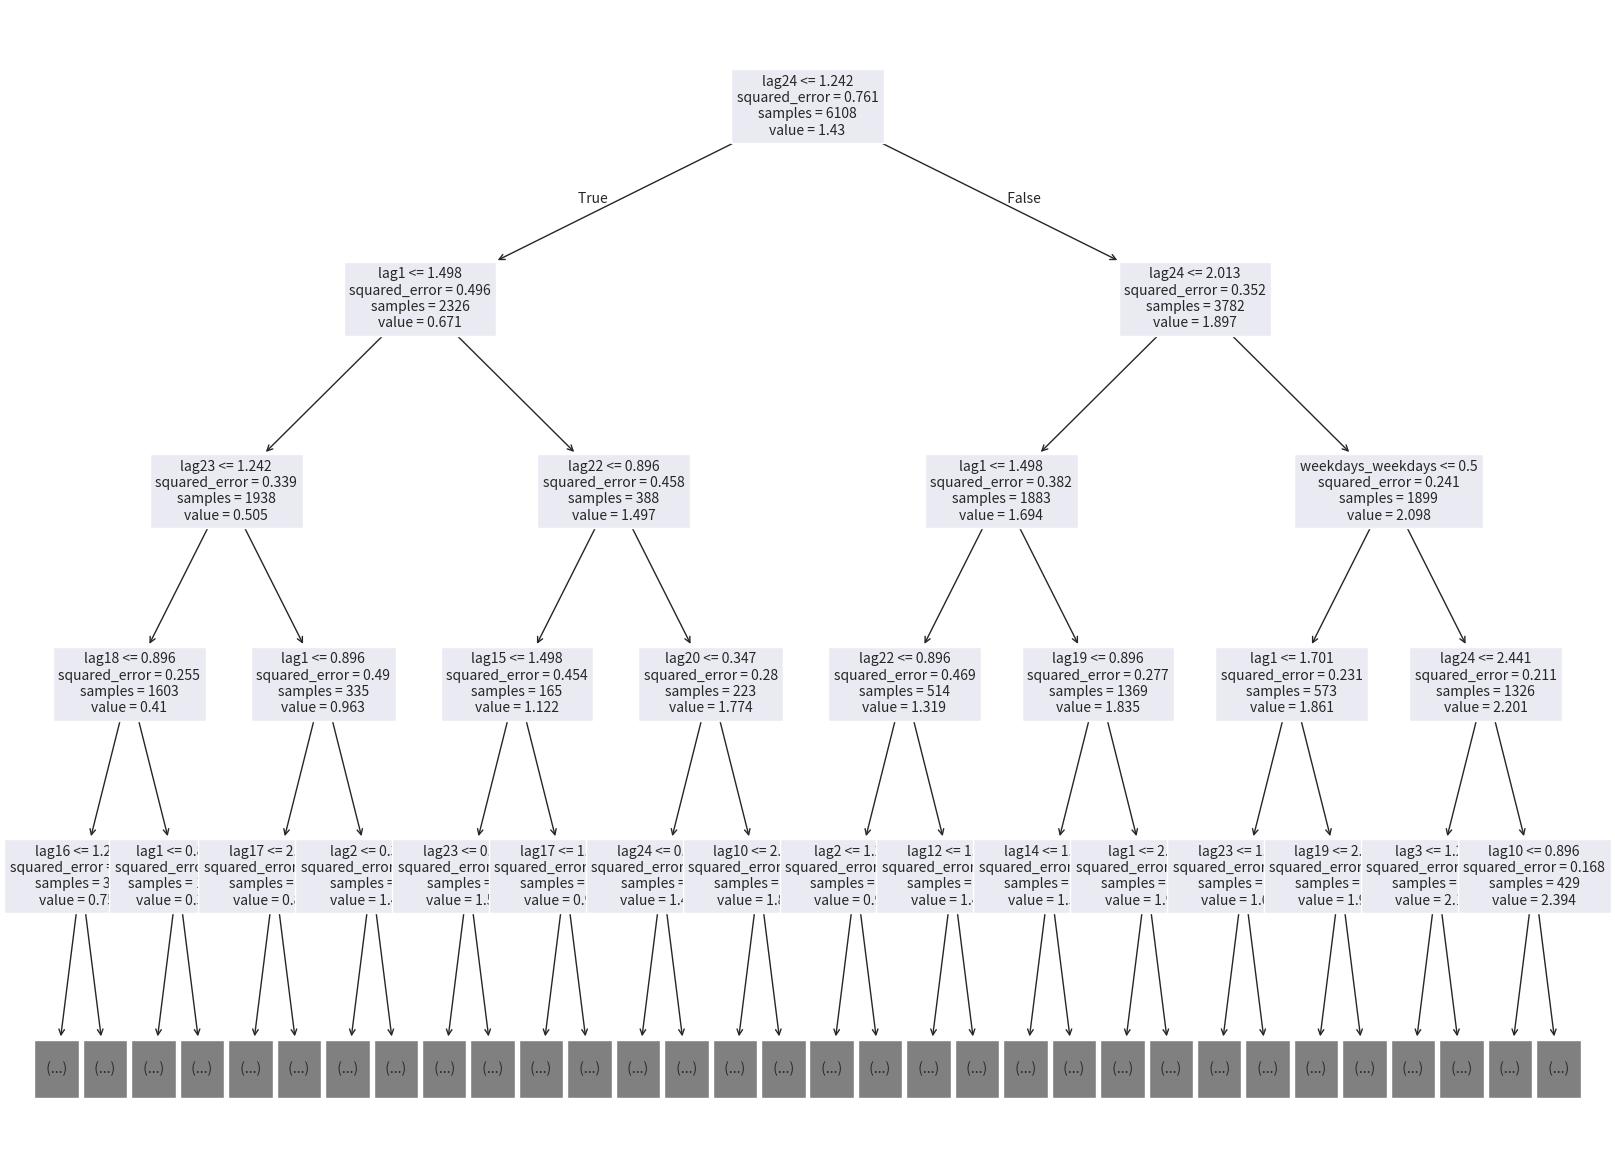

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
tree_reg.fit(train_X, train_y);


fig, axes= plt.subplots(1, 1, figsize=(20, 15))
plot_tree(tree_reg, max_depth=4, feature_names=train_X.columns,fontsize=10)
plt.show()

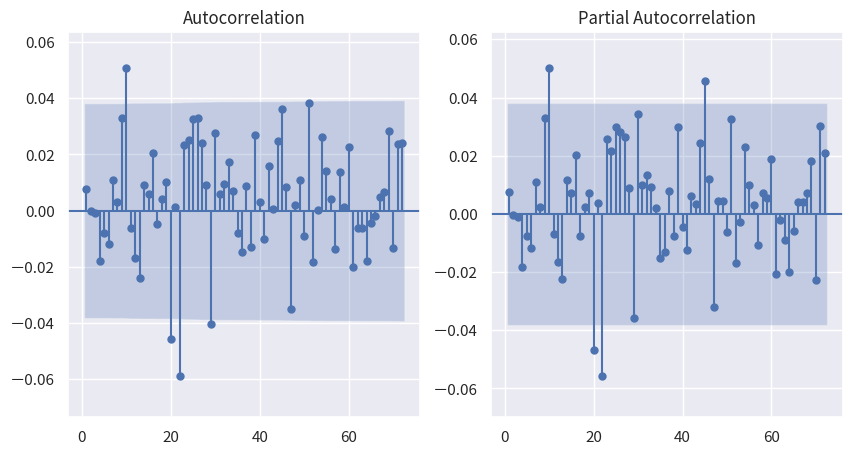

In [26]:
y_test_predict_tree = tree_reg.predict(test_X)


test_predicts_dict["tree"] = y_test_predict_tree
test_predicts_RMSE["tree"] = np.sqrt(np.mean((test_y-y_test_predict_tree)**2))
test_predicts_RMSE_org["tree"] = np.sqrt(np.mean((np.exp(test_y)-np.exp(y_test_predict_tree))**2))


# 檢查殘差的 acf 和 pacf
fig, ax = plt.subplots(1,2,figsize = (10,5))
plot_acf(test_y-y_test_predict_tree, lags = 72, zero = False,
         auto_ylims = True, ax = ax[0])
plot_pacf(test_y-y_test_predict_tree, lags = 72, zero = False,
          auto_ylims = True, ax = ax[1])
plt.show()


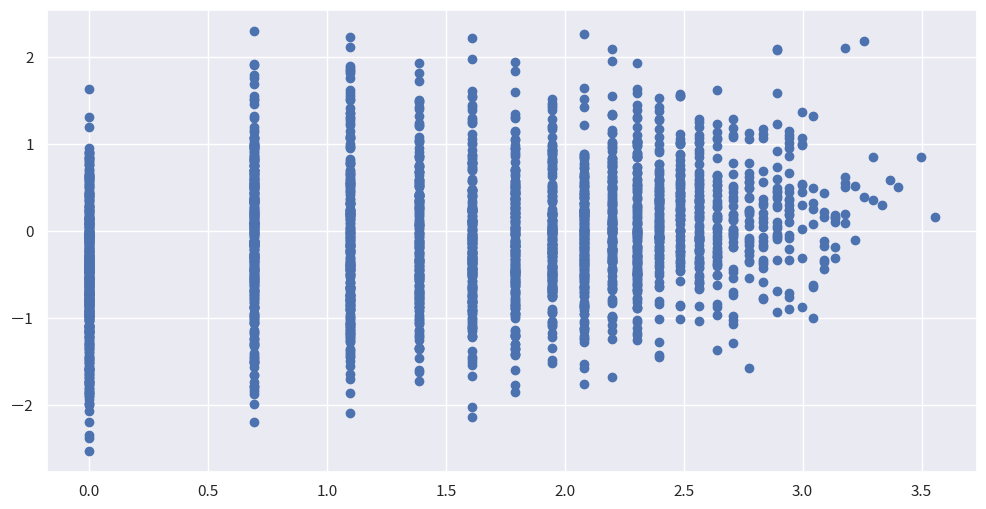

In [27]:
plt.plot(test_y,test_y-y_test_predict,'o')

## Random Forests

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_X, train_y)



RandomForestRegressor(random_state=42)

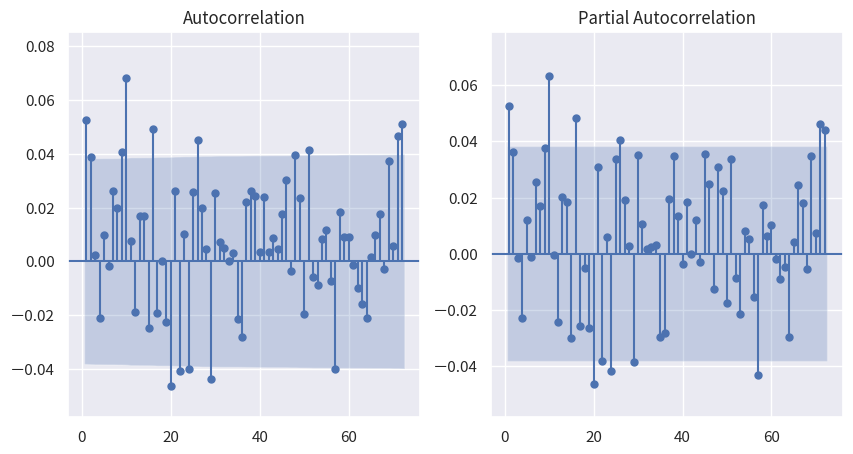

In [29]:
y_test_predict_RF = forest_reg.predict(test_X)

test_predicts_dict["RF"] = y_test_predict_RF
test_predicts_RMSE["RF"] = np.sqrt(np.mean((test_y-y_test_predict_RF)**2))
test_predicts_RMSE_org["RF"] = np.sqrt(np.mean((np.exp(test_y)-np.exp(y_test_predict_RF))**2))

# 檢查殘差的 acf 和 pacf
fig, ax = plt.subplots(1,2,figsize = (10,5))
plot_acf(test_y-y_test_predict_RF, lags = 72, zero = False,
         auto_ylims = True, ax = ax[0])
plot_pacf(test_y-y_test_predict_RF, lags = 72, zero = False,
          auto_ylims = True, ax = ax[1])
plt.show()

## Compare the Results

In [30]:
pd.DataFrame([test_predicts_RMSE,test_predicts_RMSE_org],index=["test_RMSE(log)","test_RMSE"]).T

,test_RMSE(log),test_RMSE
ARIMA,0.449652,3.171218
ARIMA_exog,0.741053,6.054232
CVLasso,0.497634,3.623343
tree,0.570510,3.628362
RF,0.456223,3.114156


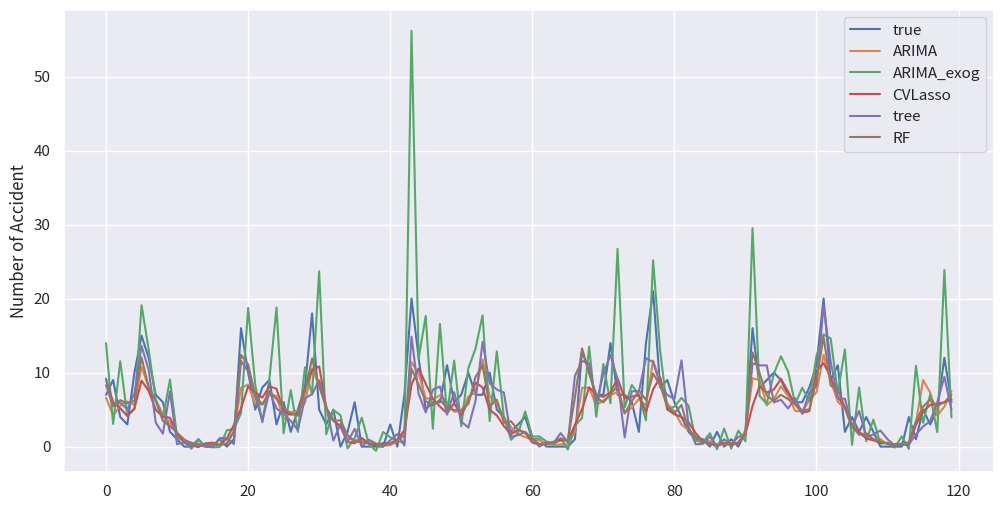

In [31]:
# 比較不同模型測試集合的預測值
test_y2 = test_y.reset_index(drop=True)
plt.plot(np.exp(test_y2)[0:24*5]-1,label = "true")
for tmp_model_str in ["ARIMA","ARIMA_exog","CVLasso","tree","RF"]:
    plt.plot(np.exp(test_predicts_dict[tmp_model_str][0:24*5])-1,label=tmp_model_str)
    plt.ylabel("Number of Accident")
plt.legend(loc="upper right")

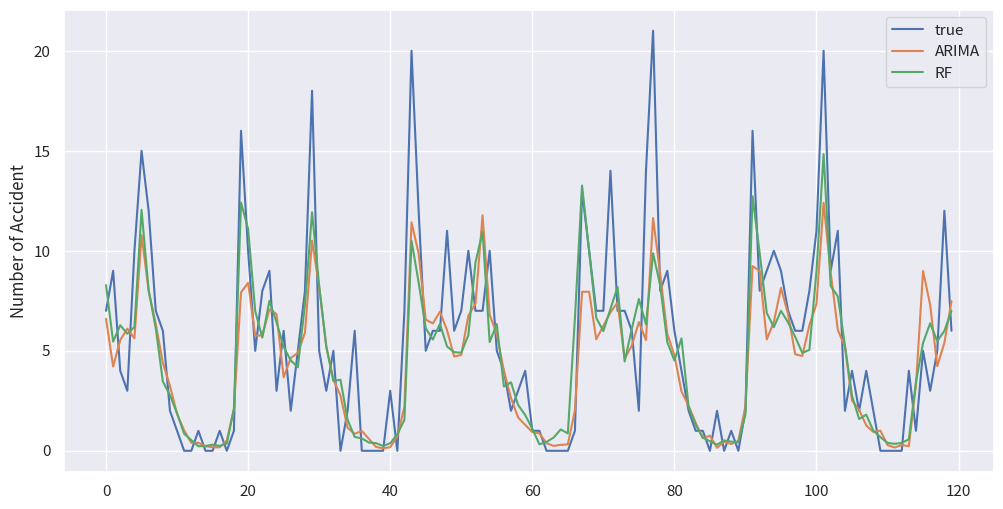

In [32]:
# 比較不同模型測試集合的預測值
test_y2 = test_y.reset_index(drop=True)
#plt.plot(np.exp(test_y2)[0:24*10]-1,label = "true")
plt.plot(np.exp(test_y2)[0:24*5]-1,label = "true")
for tmp_model_str in ["ARIMA","RF"]:
    plt.plot(np.exp(test_predicts_dict[tmp_model_str][0:24*5])-1,label=tmp_model_str)
    plt.ylabel("Number of Accident")


plt.legend(loc="upper right")